In [582]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# Spikes
- Look at daily machine vends and idenify machines with spikes. E.g. (x-mean)/ 3*std)
- machines with atleast 7 days of data [redacting]
- (x-mean)/ 3*std) > 1


In [583]:
sp= pd.read_csv('/content/DFORE153spk6m.csv')

In [584]:
sum(sp.machine_id.value_counts()> 7)

21212

In [585]:
# inlist= sp.machine_id.value_counts()[sp.machine_id.value_counts()> 7].index.tolist()

In [586]:
# sp=sp.loc[sp.machine_id.isin(inlist)]

In [587]:
# sp.describe()

The following machine installation is 3 days old and shows really very high TXns volume in those 3 days

In [588]:
sp.loc[sp.means== sp.means.max()]

,machine_id,TxnDate,Txns,means,standev,std1,std2,std3
805216,LTH-747,08/14/2021,52640,58198,19546.079334,-0.284339,-0.142173,-0.094783
805217,LTH-747,08/15/2021,79922,58198,19546.079334,1.111368,0.555698,0.370469
805218,LTH-747,08/16/2021,42034,58198,19546.079334,-0.826927,-0.413474,-0.275652


In [589]:
# gtaweek= sp.groupby('machine_id')['TxnDate'].nunique()[sp.groupby('machine_id')['TxnDate'].nunique()> 7].index.tolist()

In [590]:
# sp1= sp.loc[sp.machine_id.isin(gtaweek)]

In [591]:
sp['gt_std3']= sp.std3 > 1

In [592]:
sp1= sp.loc[sp.gt_std3 ==True]

In [593]:
sp1.describe()

,Txns,means,standev,std1,std2,std3
count,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000
mean,171.348749,10.486595,31.359701,3.025185,1.786607,1.272144
std,1801.016895,93.443327,312.532601,0.971050,0.462152,0.303818
min,4.000000,1.000000,0.537373,1.801205,1.286944,1.000188
25%,8.000000,1.000000,1.441593,2.449051,1.493467,1.071887
50%,11.000000,2.000000,1.998340,2.767389,1.645777,1.178207
75%,16.000000,3.000000,3.037156,3.282469,1.919055,1.365588
max,54680.000000,2573.000000,8194.460848,11.691295,5.857003,3.907199


In [594]:
#1936	8194.460848
sp.loc[sp.machine_id== sp1.loc[sp1.Txns== sp1.Txns.max(),'machine_id'].values[0]]

,machine_id,TxnDate,Txns,means,standev,std1,std2,std3,gt_std3
315528,432-GGG,05/07/2021,1,1936,8194.460848,-0.236106,-0.118060,-0.078709,False
315529,432-GGG,05/09/2021,1,1936,8194.460848,-0.236106,-0.118060,-0.078709,False
315530,432-GGG,05/14/2021,7,1936,8194.460848,-0.235374,-0.117694,-0.078464,False
315531,432-GGG,05/15/2021,8,1936,8194.460848,-0.235252,-0.117633,-0.078424,False
315532,432-GGG,05/16/2021,6,1936,8194.460848,-0.235496,-0.117755,-0.078505,False
...,...,...,...,...,...,...,...,...,...
315600,432-GGG,08/15/2021,981,1936,8194.460848,-0.116528,-0.058268,-0.038846,False
315601,432-GGG,08/16/2021,340,1936,8194.460848,-0.194742,-0.097377,-0.064919,False
315602,432-GGG,08/17/2021,6414,1936,8194.460848,0.546400,0.273217,0.182148,False
315603,432-GGG,08/19/2021,11,1936,8194.460848,-0.234886,-0.117450,-0.078302,False


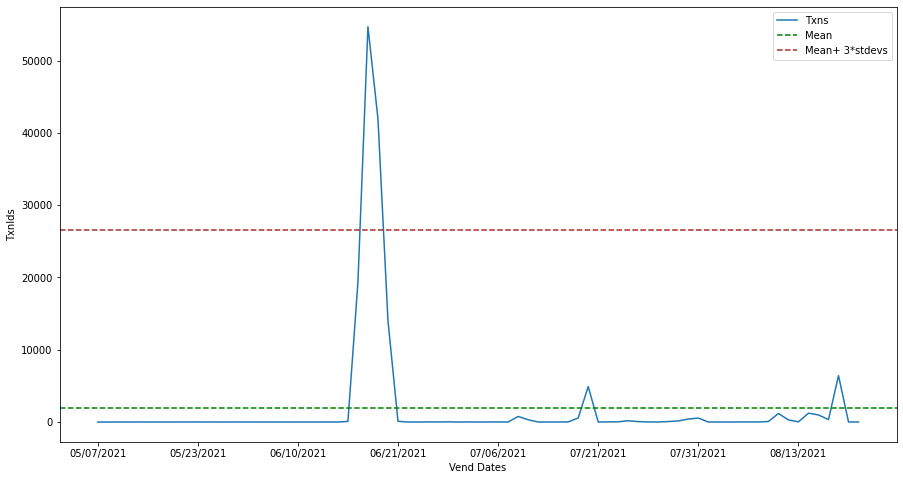

In [595]:
sp.loc[sp.machine_id== sp1.loc[sp1.Txns== sp1.Txns.max(),'machine_id'].values[0]].plot(kind= 'line', x='TxnDate', y='Txns', figsize=(15, 8))
plt.axhline(y=1936, color='green', linestyle='--', label='Mean')
plt.xlabel('Vend Dates')
plt.ylabel('TxnIds')

plt.axhline(y=1936+ 3*8194.460848, color='brown', linestyle='--',label='Mean+ 3*stdevs')
plt.legend()

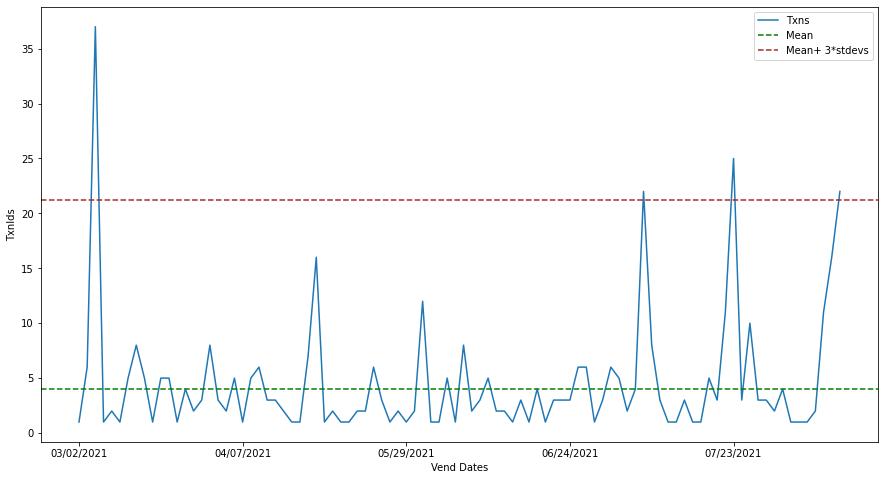

In [596]:
sp.loc[sp.machine_id== '099-CLK'].plot(kind= 'line', x='TxnDate', y='Txns', figsize=(15, 8))
plt.axhline(y=4, color='green', linestyle='--', label='Mean')
plt.xlabel('Vend Dates')
plt.ylabel('TxnIds')
plt.axhline(y=4+ 3*5.735026, color='brown', linestyle='--', label='Mean+ 3*stdevs')
plt.legend()

In [597]:
sp.loc[sp.machine_id== '000-BWN']

,machine_id,TxnDate,Txns,means,standev,std1,std2,std3,gt_std3
139,000-BWN,07/10/2021,2,1,1.247219,0.444994,0.286169,0.210897,False
140,000-BWN,07/11/2021,1,1,1.247219,0.000000,0.000000,0.000000,False
141,000-BWN,07/16/2021,1,1,1.247219,0.000000,0.000000,0.000000,False
142,000-BWN,07/20/2021,2,1,1.247219,0.444994,0.286169,0.210897,False
143,000-BWN,07/21/2021,1,1,1.247219,0.000000,0.000000,0.000000,False
144,000-BWN,07/22/2021,2,1,1.247219,0.444994,0.286169,0.210897,False
145,000-BWN,07/23/2021,1,1,1.247219,0.000000,0.000000,0.000000,False
146,000-BWN,07/24/2021,1,1,1.247219,0.000000,0.000000,0.000000,False
147,000-BWN,07/28/2021,1,1,1.247219,0.000000,0.000000,0.000000,False
148,000-BWN,07/30/2021,1,1,1.247219,0.000000,0.000000,0.000000,False


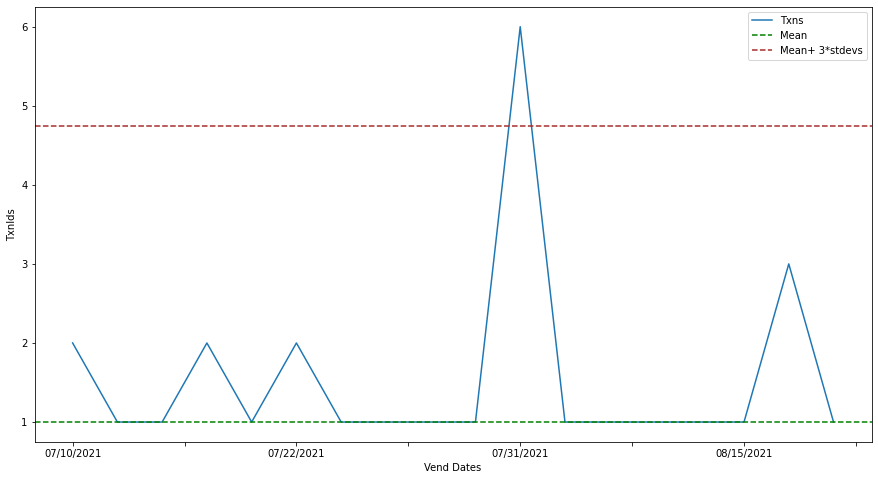

In [598]:
sp.loc[sp.machine_id== '000-BWN'].plot(kind= 'line', x='TxnDate', y='Txns', figsize=(15, 8))
plt.axhline(y=1, color='green', linestyle='--', label='Mean')
plt.xlabel('Vend Dates')
plt.ylabel('TxnIds')
plt.axhline(y=1+ 3*	1.247219, color='brown', linestyle='--', label='Mean+ 3*stdevs')
plt.legend()

In [599]:

100* len(sp.loc[sp.gt_std3, 'machine_id'].unique())/ len(sp.machine_id.unique())

23.506799754498175

In [600]:
# sp.loc[(sp.machine_id=='099-CLK')].sort_values('TxnDate').head(150)
#stdx= (value- mean)/x*std

In [601]:
# sp.head()

In [602]:
gt3= sp.groupby('machine_id')['gt_std3'].sum().reset_index()
std3= sp.groupby('machine_id')['std3', 'Txns'].agg(['min', 'max']).reset_index()
std3['MaxMinDiff']= std3.loc[:, 'std3']['max']- std3.loc[:, 'std3']['min']
std3['MaxMinDiff'].describe(percentiles=[.05,.25,.75,.95,.99,.999])

count    28007.000000
mean         0.871855
std          0.462257
min          0.000000
5%           0.000000
25%          0.579796
50%          0.868261
75%          1.150598
95%          1.614900
99%          2.133585
99.9%        3.031375
max          3.946077
Name: MaxMinDiff, dtype: float64

In [603]:
std3.loc[std3.machine_id=='419-GHT']

machine_id      std3           Txns         MaxMinDiff
                       min       max  min     max           
11681    419-GHT -0.359047  0.730013    1  123088    1.08906

In [604]:
sp.loc[sp.machine_id== '716-BLB']

,machine_id,TxnDate,Txns,means,standev,std1,std2,std3,gt_std3
553281,716-BLB,03/22/2021,2,3,15.944683,-0.059016,-0.030405,-0.020478,False
553282,716-BLB,03/24/2021,10,3,15.944683,0.413109,0.212835,0.143343,False
553283,716-BLB,03/25/2021,2,3,15.944683,-0.059016,-0.030405,-0.020478,False
553284,716-BLB,03/27/2021,3,3,15.944683,0.000000,0.000000,0.000000,False
553285,716-BLB,03/28/2021,164,3,15.944683,9.501506,4.895199,3.296880,True
...,...,...,...,...,...,...,...,...,...
553380,716-BLB,08/15/2021,3,3,15.944683,0.000000,0.000000,0.000000,False
553381,716-BLB,08/16/2021,4,3,15.944683,0.059016,0.030405,0.020478,False
553382,716-BLB,08/17/2021,2,3,15.944683,-0.059016,-0.030405,-0.020478,False
553383,716-BLB,08/18/2021,2,3,15.944683,-0.059016,-0.030405,-0.020478,False


In [605]:
std3.loc[std3.MaxMinDiff > 3.03, 'machine_id']

1297     044-BYY
1753     060-HPN
2776     094-BYT
2814     095-CLK
2876     097-CLK
2906     098-CLK
5986     205-DHX
6076     208-DHX
6496     226-BYY
7051     246-BNM
8532     299-GGG
8559     300-GGG
10716    384-DJK
13236    470-BLC
13522    476-GWT
14053    488-HWT
14600    509-JGK
16457    575-DPL
16977    594-GYT
18619    654-BBT
19583    684-BBT
20498    716-BLB
20637    721-BFM
23567    810-BXJ
24269    833-DJZ
24582    844-BXJ
26428    908-DNW
26674    916-DNW
27489    949-BZT
Name: machine_id, dtype: object

In [606]:
gt3.gt_std3.value_counts()

0    23680
1     5861
2     1192
3      190
4       33
5        1
Name: gt_std3, dtype: int64

# Aggregate Measures



In [607]:
df= pd.read_csv('/content/DFORE153D108206m.csv')

In [608]:
len(df.machine_id)-len(df.machine_id.unique())

11453

In [609]:
df.sort_values(['machine_id', 'TimeLength'], ascending= False, inplace= True)

In [610]:
df.drop_duplicates('machine_id', keep='first', inplace= True)

In [611]:
df.loc[df.machine_id=='708-BZW']

,machine_id,machine_type,controller_type,NonCashTotTxn,BaseCycles,TopOffs,TotCorr,TotTxn,LastTxnDate,FirstTxnDate,TimeLength
27642,708-BZW,Dryer,hybrid,0,0,349110,349110,349110,2021-08-16 18:54:52.0000000,2021-07-31 08:17:38.0000000,17


In [612]:
df.isnull().sum()

machine_id             0
machine_type        1782
controller_type    15792
NonCashTotTxn          0
BaseCycles             0
TopOffs                0
TotCorr                0
TotTxn                 0
LastTxnDate            0
FirstTxnDate           0
TimeLength             0
dtype: int64

In [613]:
# df1= df.loc[df.TimeLength>7]
df.loc[df.TimeLength==1].describe()

,NonCashTotTxn,BaseCycles,TopOffs,TotCorr,TotTxn,TimeLength
count,3590.000000,3590.000000,3590.000000,3590.000000,3590.00000,3590.0
mean,0.910028,1.128969,1.192201,1.702228,2.32117,1.0
std,0.858949,1.059301,24.781168,6.043418,24.80309,0.0
min,0.000000,0.000000,0.000000,1.000000,1.00000,1.0
25%,0.000000,1.000000,0.000000,1.000000,1.00000,1.0
50%,1.000000,1.000000,0.000000,1.000000,1.00000,1.0
75%,1.000000,1.000000,0.000000,1.000000,1.00000,1.0
max,14.000000,35.000000,1078.000000,205.000000,1078.00000,1.0


In [614]:
df['Txn2CorrRatio']= df['TotTxn'].divide(df['TotCorr'])
df['TopOffProportion']= df.TopOffs.divide(df['BaseCycles']+df.TopOffs)
df['TxnDailyAvg']= df.TotTxn.divide(df.TimeLength)
df['cash2AllTxnRatio']= (df.TotTxn-df.NonCashTotTxn)/df.TotTxn

In [615]:
df.shape

(30881, 15)

In [616]:
std3.shape

(30957, 6)

In [617]:
std3.columns= ['machine_id', 'std3_min', 'std3_max', 'txns_min', 'txns_max', 'MaxMinDiff']

In [618]:
df2= df.merge(std3, how= 'left', left_on='machine_id', right_on='machine_id')

In [619]:
df2.isnull().sum()

machine_id              0
machine_type         1782
controller_type     15792
NonCashTotTxn           0
BaseCycles              0
TopOffs                 0
TotCorr                 0
TotTxn                  0
LastTxnDate             0
FirstTxnDate            0
TimeLength              0
Txn2CorrRatio           0
TopOffProportion        0
TxnDailyAvg             0
cash2AllTxnRatio        0
std3_min             2952
std3_max             2952
txns_min               56
txns_max               56
MaxMinDiff           2952
dtype: int64

## Features:
- `'Txn2CorrRatio'`: TxnIds per Correlation_ID
- `'TopOffProportion'`: Proportion of Top off at a machine
- `'TxnDailyAvg'`: 
- `'cash2AllTxnRatio'`: 
- `'std3'`: 

In [620]:
df2= df.merge(std3, how= 'left', left_on='machine_id', right_on='machine_id')

In [621]:
df2.shape

(30881, 20)

In [622]:
df2.columns

Index(['machine_id', 'machine_type', 'controller_type', 'NonCashTotTxn',
       'BaseCycles', 'TopOffs', 'TotCorr', 'TotTxn', 'LastTxnDate',
       'FirstTxnDate', 'TimeLength', 'Txn2CorrRatio', 'TopOffProportion',
       'TxnDailyAvg', 'cash2AllTxnRatio', 'std3_min', 'std3_max', 'txns_min',
       'txns_max', 'MaxMinDiff'],
      dtype='object')

In [623]:
features= [ 'TxnDailyAvg','TopOffProportion','MaxMinDiff','Txn2CorrRatio', 'cash2AllTxnRatio']

In [624]:
# df2.controller_type.fillna('unknown', inplace=True)

In [625]:
df2.dropna(inplace=True)

In [626]:
comp_pct= df2.loc[:,features].rank(ascending=False, pct=False).sum(axis=1).rank(ascending=False, pct=True)

In [627]:
df2['SumRank']= df2.groupby(['machine_type', 'controller_type'])[features].rank("dense", ascending=True, pct=True).sum(axis=1)

In [628]:
pctLst= ['5%', '10%', '15%', '20%', '25%', '30%', '35%', '40%', '45%', '50%', '55%', '60%', '65%', '70%', '75%', '80%', '85%', '90%', '95%', '99%', '99.5%', '99.9%', '100%']
pcts= [.05,.1,.15,.2,.25, .3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8, .85,.9,.95,.99, .995,.999, 1]

In [629]:
# df2.SumRank.describe(percentiles=pcts)

In [690]:
cut

5.0

In [691]:
df2.loc[df2.SumRank <= cut, 'TotTxn'].sum()

2005763

In [631]:
df2.SumRank.describe(percentiles=[.95])

count    12290.000000
mean         1.830555
std          1.038462
min          0.005889
50%          1.637019
95%          3.777582
max          5.000000
Name: SumRank, dtype: float64

In [681]:
recs=[]
for i in range(len(pcts)):
  # print(pctLst[i], pcts[i], df2.SumRank.describe(percentiles=[pcts[i]])[pctLst[i]])
  cut= df2.SumRank.describe(percentiles=[pcts[i]])[pctLst[i]]
  TotTxnIds= df2.loc[df2.SumRank <= cut, 'TotTxn'].sum()
  print(pctLst[i], pcts[i], cut, TotTxnIds)
  recs.append([pctLst[i], pcts[i], cut, TotTxnIds])

5% 0.05 0.3561275877389321 4107
10% 0.1 0.5817704447091052 10417
15% 0.15 0.7858577981585091 18389
20% 0.2 0.983084974896196 30324
25% 0.25 1.0938685946251594 39962
30% 0.3 1.183729475966956 48991
35% 0.35 1.29055374220714 60859
40% 0.4 1.3935492336384745 73134
45% 0.45 1.5112464997990138 87704
50% 0.5 1.63701873585162 104383
55% 0.55 1.7736855332054553 122822
60% 0.6 1.9072793871843507 145422
65% 0.65 2.0671399964166834 170495
70% 0.7 2.2783847587348838 194405
75% 0.75 2.498647978316778 218279
80% 0.8 2.8005467011224208 246763
85% 0.85 3.07467231044026 272925
90% 0.9 3.3886981081620577 302967
95% 0.95 3.7775816416593115 352449
99% 0.99 4.392195319227157 576304
99.5% 0.995 4.60782947230061 584404
99.9% 0.999 4.9056146138649765 1606405
100% 1 5.0 2005763


In [683]:
(1606405/2005763)- (584404/2005763)

0.5095322827273212

In [633]:
fin= pd.DataFrame.from_records(recs)

In [634]:
fin.columns=['PercentileLabel', 'Percentile', 'PercentileValueCutOff', 'TotalTxnIds']

In [635]:
fin['TotalTxnIds%']= fin.TotalTxnIds/ fin.TotalTxnIds.max()

In [684]:
fin

,PercentileLabel,Percentile,PercentileValueCutOff,TotalTxnIds,TotalTxnIds%
0,5%,0.050,0.356128,4107,0.002048
1,10%,0.100,0.581770,10417,0.005194
2,15%,0.150,0.785858,18389,0.009168
3,20%,0.200,0.983085,30324,0.015118
4,25%,0.250,1.093869,39962,0.019924
5,30%,0.300,1.183729,48991,0.024425
6,35%,0.350,1.290554,60859,0.030342
7,40%,0.400,1.393549,73134,0.036462
8,45%,0.450,1.511246,87704,0.043726
9,50%,0.500,1.637019,104383,0.052042


In [636]:
# fin

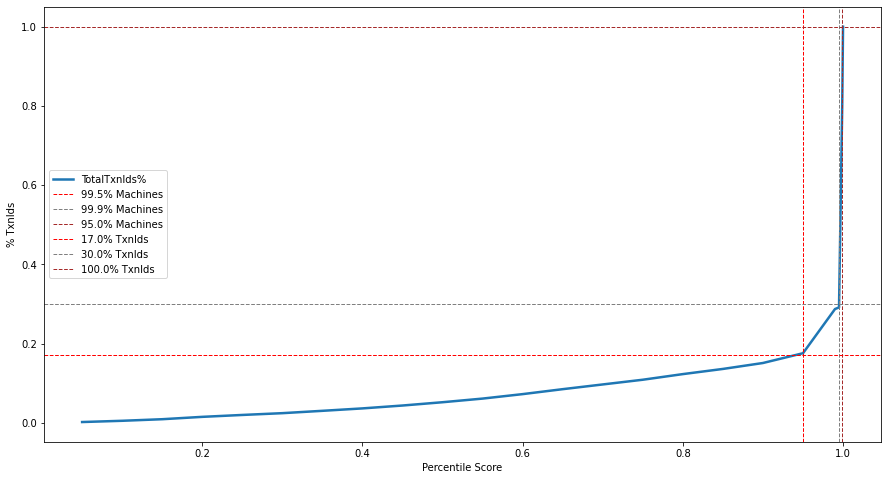

In [643]:
fin.plot('Percentile', 'TotalTxnIds%', kind= 'line', figsize=(15,8), linewidth=2.5)
plt.xlabel('Percentile Score')
plt.ylabel('% TxnIds')
plt.axvline(x=.95, color='red', linestyle='--', label='99.5% Machines', linewidth=1)
plt.axvline(x=.995, color='gray', linestyle='--', label='99.9% Machines', linewidth=1)
plt.axvline(x=.999, color='brown', linestyle='--', label='95.0% Machines', linewidth=1)
plt.axhline(y=.17, color='red', linestyle='--', label='17.0% TxnIds', linewidth=1)
plt.axhline(y=.3, color='gray', linestyle='--', label='30.0% TxnIds', linewidth=1)
plt.axhline(y=1, color='brown', linestyle='--', label='100.0% TxnIds', linewidth=1)
plt.legend()

In [646]:
cut95= df2.SumRank.describe(percentiles=[.05,.1,.15,.2,.25, .3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.85,.9,.95,.99, .995,.999])['95%']

In [647]:
cut999= df2.SumRank.describe(percentiles=[.05,.1,.15,.2,.25, .3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.85,.9,.95,.99, .995,.999])['99.9%']

In [652]:
cut995= df2.SumRank.describe(percentiles=[.05,.1,.15,.2,.25, .3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.85,.9,.95,.99, .995,.999])['99.5%']

In [654]:
cut99= df2.SumRank.describe(percentiles=[.05,.1,.15,.2,.25, .3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.85,.9,.95,.99, .995,.999])['99%']

In [658]:
df2.loc[df2.SumRank > cut95, 'pct_flg']= '>95pct'

In [659]:
df2.loc[df2.SumRank > cut99, 'pct_flg']= '>99pct'

In [660]:
df2.loc[df2.SumRank > cut995, 'pct_flg']= '>99.5pct'

In [661]:
df2.loc[df2.SumRank > cut999, 'pct_flg']= '>99.9pct'

In [662]:
df2.pct_flg.fillna('<=95pct', inplace=True)

In [692]:
map_dict= dict(zip(df2.pct_flg.unique().tolist(), ['5. Not Rogue', '4. Low Risk', '2. High  Risk', '1. High Risk- Critical', '3. Moderate Risk']))

In [693]:
map_dict

{'<=95pct': '5. Not Rogue',
 '>95pct': '4. Low Risk',
 '>99.5pct': '2. High  Risk',
 '>99.9pct': '1. High Risk- Critical',
 '>99pct': '3. Moderate Risk'}

In [676]:
df2['priority']= df2.pct_flg.map(map_dict)

In [677]:
df2.priority.value_counts()

5. Not Rogue              11679
4. Low Risk                 488
3. Moderate Risk             61
2. High  Risk                49
1. High Risk- Critical       13
Name: priority, dtype: int64

In [689]:
pd.crosstab(df2.controller_type, df2.priority, margins=True)

priority,1. High Risk- Critical,2. High Risk,3. Moderate Risk,4. Low Risk,5. Not Rogue,All
controller_type,,,,,,
ACA,3,13,23,161,3620,3820
ACA-A1,0,1,1,3,65,70
MDC,4,12,13,195,4916,5140
Maytag,0,0,0,4,36,40
QPRO,1,3,4,17,538,563
hybrid,4,20,20,108,2504,2656
unknown,1,0,0,0,0,1
All,13,49,61,488,11679,12290


In [680]:
df2.loc[df2.priority== '1. High Risk- Critical', 'TotTxn'].sum()

399358

In [223]:
df2.loc[df2.SumRank >= df2.SumRank.describe(percentiles=[.99])['99%'],'controller_type'].value_counts()

hybrid     43
ACA        36
MDC        26
QPRO        7
ACA-A1      1
unknown     1
Name: controller_type, dtype: int64

In [111]:
df2.loc[df2.SumRank > .995].controller_type.value_counts()

MDC        4192
ACA        2816
hybrid     2240
QPRO        406
ACA-A1       67
Maytag       35
unknown       1
Name: controller_type, dtype: int64

In [ ]:
for f in features:
  print(f)

TxnDailyAvg
std3
TopOffProportion
Txn2CorrRatio
cash2AllTxnRatio


In [ ]:
df2.shape

(29044, 16)

In [ ]:
df2.controller_type.value_counts()

unknown    15246
MDC         5140
ACA         3820
hybrid      2656
QPRO         563
ACA-A1        70
Maytag        40
Name: controller_type, dtype: int64

In [685]:
df3=df2.loc[df2.machine_type== 'Dryer'].groupby('controller_type')[features].describe(percentiles=[.05, .25, .5, .75, .95, .96, .97, .98, .99, .999]).stack(level=0).loc[:,['5%', '25%', '50%', '75%', '95%', '96%', '97%', '98%', '99%', '99.9%', 'max']]

In [687]:
df3

5%       25%  ...       99.9%           max
controller_type                                       ...                          
ACA             MaxMinDiff        0.000000  0.542994  ...    2.026216      2.363589
                TopOffProportion  0.000000  0.000000  ...    0.998971      1.000000
                Txn2CorrRatio     1.000000  1.000000  ...    8.849767     34.991071
                TxnDailyAvg       0.384135  0.954004  ...  175.015855    907.225806
                cash2AllTxnRatio  0.000000  0.142857  ...    1.000000      1.000000
ACA-A1          MaxMinDiff        0.000000  0.000000  ...    0.744266      0.745758
                TopOffProportion  0.000000  0.000000  ...    0.058706      0.058824
                Txn2CorrRatio     1.000000  1.000000  ...    1.062375      1.062500
                TxnDailyAvg       0.157985  0.249386  ...    0.447201      0.447368
                cash2AllTxnRatio  0.412941  0.464706  ...    0.999059      1.000000
MDC             MaxMinDiff        0.000000  0.580022  ...    1.819941      2.717348
                TopOffProportion  0.000000  0.000000  ...    1.000000      1.000000
                Txn2CorrRatio     1.000000  1.000000  ...    3.000000      5.500000
                TxnDailyAvg       0.333333  0.801220  ...   19.116634    446.275862
                cash2AllTxnRatio  0.000000  0.666667  ...    1.000000      1.000000
Maytag          MaxMinDiff        0.000000  0.406993  ...    1.077706      1.080748
                TopOffProportion  0.000000  0.000000  ...    0.662381      0.666667
                Txn2CorrRatio     1.000000  1.000000  ...    2.971650      3.000000
                TxnDailyAvg       0.193466  0.928571  ...    5.666238      5.666667
                cash2AllTxnRatio  0.634211  0.763889  ...    1.000000      1.000000
QPRO            MaxMinDiff        0.000000  0.504528  ...    1.556424      1.588656
                TopOffProportion  0.000000  0.000000  ...    0.847831      0.857143
                Txn2CorrRatio     1.000000  1.000000  ...    3.835735      3.941176
                TxnDailyAvg       0.497727  1.000000  ...   10.148833     10.666667
                cash2AllTxnRatio  0.000000  0.000000  ...    1.000000      1.000000
hybrid          MaxMinDiff        0.000000  0.000000  ...    1.494844      1.744278
                TopOffProportion  0.000000  0.000000  ...    1.000000      1.000000
                Txn2CorrRatio     1.000000  1.000000  ...    1.000000      1.000000
                TxnDailyAvg       0.142857  0.333333  ...  700.767586  20535.882353
                cash2AllTxnRatio  0.000000  0.000000  ...    1.000000      1.000000
unknown         MaxMinDiff        0.592384  0.592384  ...    0.592384      0.592384
                TopOffProportion  0.000000  0.000000  ...    0.000000      0.000000
                Txn2CorrRatio     1.000000  1.000000  ...    1.000000      1.000000
                TxnDailyAvg       2.750000  2.750000  ...    2.750000      2.750000
                cash2AllTxnRatio  0.000000  0.000000  ...    0.000000      0.000000

[35 rows x 11 columns]

In [ ]:
df4=df2.loc[df2.machine_type== 'Washer'].groupby('controller_type')[features].describe(percentiles=[.05, .25, .5, .75, .95, .96, .97, .98, .99, .999]).stack(level=0).loc[:,['5%', '25%', '50%', '75%', '95%', '96%', '97%', '98%', '99%', '99.9%', 'max']]

In [ ]:
df4

5%       25%  ...        99.9%           max
controller_type                                       ...                           
ACA             TopOffProportion  0.000000  0.000000  ...     1.000000      1.000000
                Txn2CorrRatio     1.000000  1.000000  ...    48.976782    485.000000
                TxnDailyAvg       0.333333  0.833333  ...   884.404387  32471.080000
                cash2AllTxnRatio  0.000000  0.200000  ...     1.000000      1.000000
                gt_std3           0.000000  0.000000  ...     2.000000      2.000000
ACA-A1          TopOffProportion  0.000000  0.000000  ...     0.974667      1.000000
                Txn2CorrRatio     1.000000  1.000000  ...     1.656581      1.692308
                TxnDailyAvg       0.566957  1.000000  ...     7.651448      8.000000
                cash2AllTxnRatio  0.057143  0.800000  ...     1.000000      1.000000
                gt_std3           0.000000  0.000000  ...     1.000000      1.000000
MDC             TopOffProportion  0.000000  0.000000  ...     1.000000      1.000000
                Txn2CorrRatio     1.000000  1.000000  ...     9.999386     38.000000
                TxnDailyAvg       0.318909  0.750000  ...   235.137437   3387.121951
                cash2AllTxnRatio  0.000000  0.666667  ...     1.000000      1.000000
                gt_std3           0.000000  0.000000  ...     2.000000      3.000000
Maytag          TopOffProportion  0.000000  0.000000  ...     0.774387      0.777778
                Txn2CorrRatio     1.000000  1.000000  ...     4.457833      4.500000
                TxnDailyAvg       0.115667  1.000000  ...     8.906923      9.000000
                cash2AllTxnRatio  0.066667  0.775000  ...     1.000000      1.000000
                gt_std3           0.000000  0.000000  ...     0.978000      1.000000
QPRO            TopOffProportion  0.000000  0.000000  ...     0.995751      0.996988
                Txn2CorrRatio     1.000000  1.000000  ...     1.515434      1.660714
                TxnDailyAvg       0.500000  1.000000  ...   124.616952    181.285714
                cash2AllTxnRatio  0.000000  0.000000  ...     1.000000      1.000000
                gt_std3           0.000000  0.000000  ...     1.000000      1.000000
hybrid          TopOffProportion  0.000000  0.000000  ...     1.000000      1.000000
                Txn2CorrRatio     1.000000  1.000000  ...     1.052500      1.419847
                TxnDailyAvg       0.166667  0.357143  ...  2138.885000  12276.166667
                cash2AllTxnRatio  0.000000  0.000000  ...     1.000000      1.000000
                gt_std3           0.000000  0.000000  ...     1.000000      2.000000
unknown         TopOffProportion  0.000000  0.000000  ...     1.000000      1.000000
                Txn2CorrRatio     1.000000  1.000000  ...    62.942429    583.022727
                TxnDailyAvg       0.159714  0.528247  ...  1411.120845  16045.611111
                cash2AllTxnRatio  0.000000  0.534724  ...     1.000000      1.000000
                gt_std3           0.000000  0.000000  ...     3.000000      4.000000

[35 rows x 11 columns]

In [ ]:
df5=df2.groupby(['machine_type', 'controller_type'])[features].describe(percentiles=[.05, .25, .5, .75, .95, .96, .97, .98, .99, .999]).stack(level=0).loc[:,['5%', '25%', '50%', '75%', '95%', '96%', '97%', '98%', '99%', '99.9%']]

In [ ]:
for f in features:
  df5[f+'_flg']= 0
  for m in df2.machine_type.unique():
    for c in df2.controller_type.unique():
      v = df5.loc[m, c, f].loc['99%']
      df2.loc[df2[f] > v, f+'_flg']=1

In [ ]:
df5.head()

5%  ...  gt_std3_flg
machine_type controller_type                             ...             
Dryer        ACA             TopOffProportion  0.000000  ...            0
                             Txn2CorrRatio     1.000000  ...            0
                             TxnDailyAvg       0.363636  ...            0
                             cash2AllTxnRatio  0.000000  ...            0
                             gt_std3           0.000000  ...            0

[5 rows x 15 columns]

In [ ]:
df2.fillna(0, inplace=True)

In [ ]:
df2['AllFlags']=df2.loc[:,['Txn2CorrRatio_flg', 'TopOffProportion_flg', 'TxnDailyAvg_flg', 'cash2AllTxnRatio_flg', 'gt_std3_flg']].sum(axis=1)

In [ ]:
df2.head()

,machine_id,machine_type,controller_type,NonCashTotTxn,BaseCycles,TopOffs,TotCorr,TotTxn,LastTxnDate,FirstTxnDate,TimeLength,Txn2CorrRatio,TopOffProportion,TxnDailyAvg,cash2AllTxnRatio,gt_std3,Txn2CorrRatio_flg,TopOffProportion_flg,TxnDailyAvg_flg,cash2AllTxnRatio_flg,gt_std3_flg,AllFlags
0,034-GFX,Washer,ACA,6,37,0,37,37,2021-08-19 22:42:32.0000000,2021-07-31 15:10:50.0000000,20,1.000000,0.000000,1.850000,0.837838,0,NaN,NaN,1.0,NaN,NaN,1.0
1,937-JHT,Dryer,hybrid,7,7,4,11,11,2021-08-18 23:02:55.3880000,2021-07-18 02:38:45.7340000,32,1.000000,0.363636,0.343750,0.363636,0,NaN,1.0,NaN,NaN,NaN,1.0
2,420-BZP,Dryer,MDC,0,42,36,70,78,2021-08-19 18:51:41.0000000,2021-07-29 12:23:48.0000000,22,1.114286,0.461538,3.545455,1.000000,1,1.0,1.0,1.0,1.0,1.0,5.0
3,286-HFF,Dryer,unknown,4,142,188,143,330,2021-08-19 23:06:58.0000000,2021-04-15 21:04:15.0000000,127,2.307692,0.569697,2.598425,0.987879,1,1.0,1.0,1.0,1.0,1.0,5.0
4,535-DRJ,Washer,unknown,22,22,0,22,22,2021-08-20 01:43:59.8930000,2021-06-20 14:23:30.5760000,62,1.000000,0.000000,0.354839,0.000000,0,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
df2.loc[df2.machine_id=='419-GHT']

,machine_id,machine_type,controller_type,NonCashTotTxn,BaseCycles,TopOffs,TotCorr,TotTxn,LastTxnDate,FirstTxnDate,TimeLength,Txn2CorrRatio,TopOffProportion,TxnDailyAvg,cash2AllTxnRatio,gt_std3,Txn2CorrRatio_flg,TopOffProportion_flg,TxnDailyAvg_flg,cash2AllTxnRatio_flg,gt_std3_flg,AllFlags
22599,419-GHT,Washer,ACA,18,39,811738,23458,811777,2021-08-16 17:58:12.4650000,2021-07-23 20:17:39.0000000,25,34.60555,0.999952,32471.08,0.999978,0,1.0,1.0,1.0,1.0,NaN,4.0


In [ ]:
df2.AllFlags.value_counts()

1.0    7221
2.0    5681
4.0    5493
3.0    5236
0.0    2292
5.0    1259
Name: AllFlags, dtype: int64

In [ ]:
df2['NoCashRatioFlags']=df2.loc[:,['Txn2CorrRatio_flg', 'TopOffProportion_flg', 'TxnDailyAvg_flg','gt_std3_flg']].sum(axis=1)

In [ ]:
df2.NoCashRatioFlags.value_counts()

1.0    8356
3.0    5987
2.0    5108
4.0    4910
0.0    2821
Name: NoCashRatioFlags, dtype: int64

In [ ]:
1300/27000

0.04814814814814815